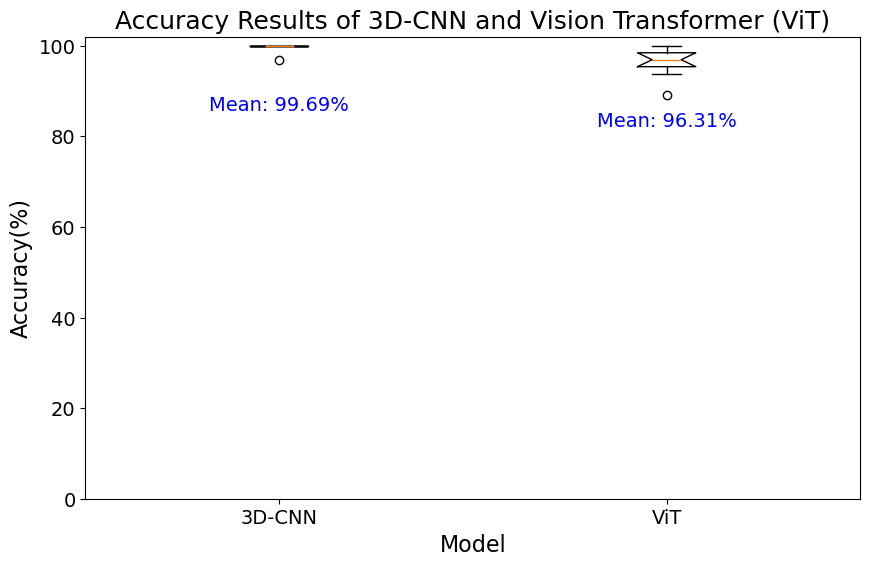

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Load the accuracy results from the text file
result = np.loadtxt("accuracy-results.txt")

# Set the desired figure size (width, height) in inches
plt.figure(figsize=(10, 6))

# Create a boxplot with notches
plt.boxplot(result, notch=True)

# Set the y-axis label with increased font size
plt.ylabel('Accuracy(%)', fontsize=16)

# Set the x-axis labels with increased font size
plt.xticks([1, 2], ['3D-CNN', 'ViT'], fontsize=14)

# Set the plot title with increased font size
plt.title("Accuracy Results of 3D-CNN and Vision Transformer (ViT)", fontsize=18)

# Set the y-axis limits
plt.ylim(0, 102)
mean_values = [np.mean(result[:,0]),np.mean(result[:,1])]
# Annotate mean values on the plot
for i, mean in enumerate(mean_values, start=1):
    plt.text(
        i, 
        mean - 14,  # Slightly above the mean marker
        f'Mean: {mean:.2f}%',
        horizontalalignment='center',
        fontsize=14,
        color='blue'
    )

# Increase the font size of y-axis tick labels
plt.yticks(fontsize=14)

# Optionally, increase the font size for the x-axis label if needed
plt.xlabel('Model', fontsize=16)  # Uncomment if you want to add an x-axis label

# Display the plot
plt.savefig("box_plot.png")
plt.show()


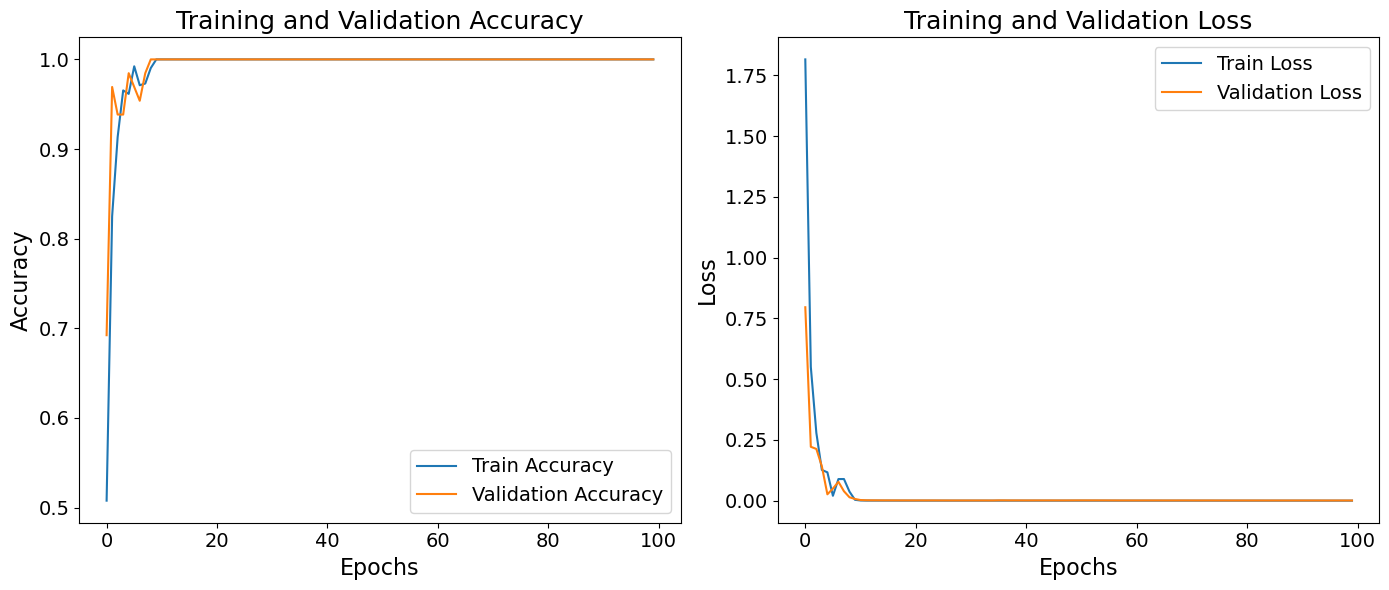

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('acc_loss.csv')

# Extract the data for plotting
epochs = df['epoch'].unique()
train_acc = df['train_acc'].dropna()
val_acc = df['val_acc'].dropna()
train_loss = df['train_loss'].dropna()
val_loss = df['val_loss'].dropna()

# Plotting the accuracy and loss curves in two different plots (left and right)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
ax1.plot(epochs[:len(train_acc)], train_acc, label='Train Accuracy')
ax1.plot(epochs[:len(val_acc)], val_acc, label='Validation Accuracy')
ax1.set_xlabel('Epochs', fontsize=16)
ax1.set_ylabel('Accuracy', fontsize=16)
ax1.set_title('Training and Validation Accuracy', fontsize=18)
ax1.legend(fontsize=14)
# ax1.grid(True)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Loss plot
ax2.plot(epochs[:len(train_loss)], train_loss, label='Train Loss')
ax2.plot(epochs[:len(val_loss)], val_loss, label='Validation Loss')
ax2.set_xlabel('Epochs', fontsize=16)
ax2.set_ylabel('Loss', fontsize=16)
ax2.set_title('Training and Validation Loss', fontsize=18)
ax2.legend(fontsize=14)
# ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.savefig("acc_loss.png")

plt.show()



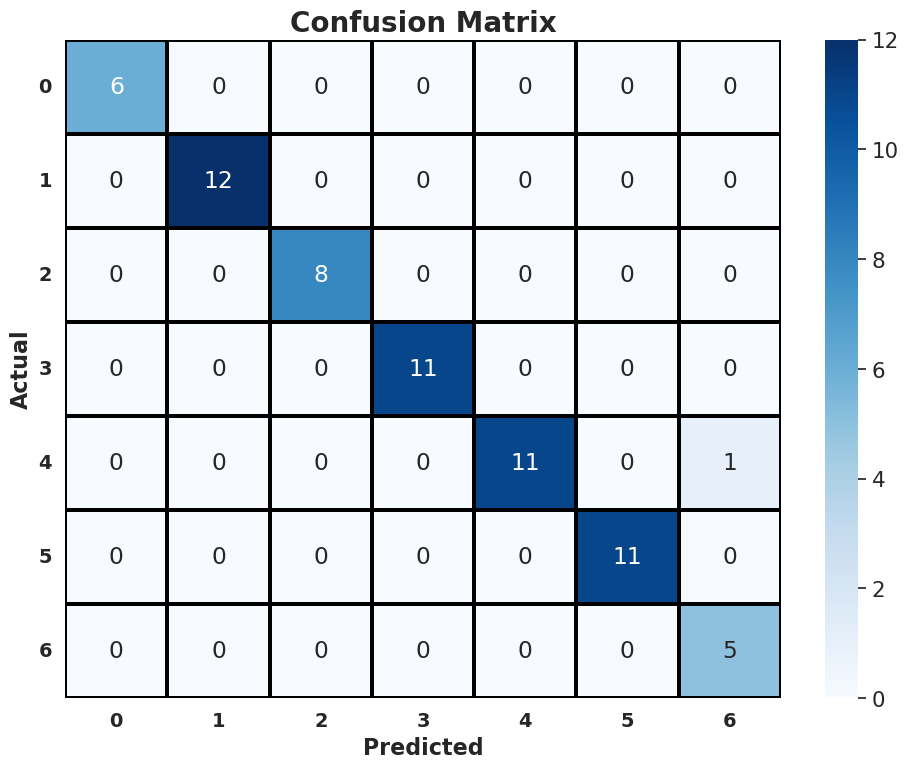

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Data Extacted from actual confusion matrix
confusion_matrix = np.array([
    [6, 0, 0, 0, 0, 0, 0],
    [0, 12, 0, 0, 0, 0, 0],
    [0, 0, 8, 0, 0, 0, 0],
    [0, 0, 0, 11, 0, 0, 0],
    [0, 0, 0, 0, 11, 0, 1],
    [0, 0, 0, 0, 0, 11, 0],
    [0, 0, 0, 0, 0, 0, 5]
])

# Set up the plot
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)

# Create heatmap with annotations
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=1.5, linecolor='black')

# Set axis labels and title
ax.set_xlabel('Predicted', fontsize=16, weight='bold')
ax.set_ylabel('Actual', fontsize=16, weight='bold')
ax.set_title('Confusion Matrix', fontsize=20, weight='bold')

# Adjust the tick labels for better readability
plt.xticks(np.arange(7) + 0.5, labels=np.arange(7), fontsize=14, weight='bold')
plt.yticks(np.arange(7) + 0.5, labels=np.arange(7), fontsize=14, weight='bold', rotation=0)

# Tight layout for better spacing
plt.tight_layout()

# Save the enhanced image
plt.savefig("enhanced_confusion_matrix.png", dpi=300)

# Display the enhanced confusion matrix
plt.show()